### Identify K Value

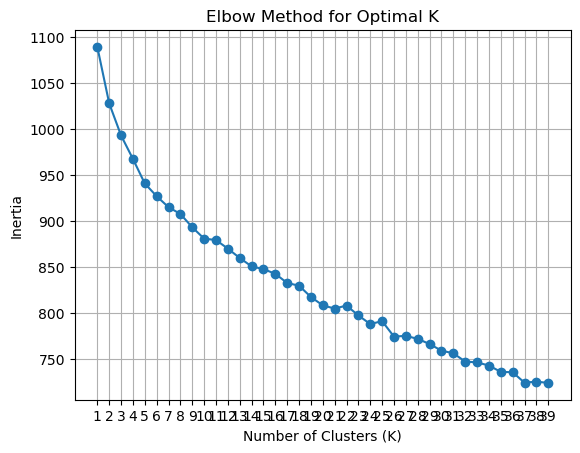

In [2]:
import os
from PyPDF2 import PdfReader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function to extract text from a PDF file
#def extract_text_from_pdf(pdf_path):
    #text = ""
    #with open(pdf_path, "rb") as file:
        #pdf_reader = PdfReader(file)
        #for page in pdf_reader.pages:
            #text += page.extract_text()
    #return text

# Folder containing the PDF files
#folder_path = "01_PDF_Sample"

# List to store text of each PDF document
#documents = []

# Iterate through PDF files in the folder and extract text
#for filename in os.listdir(folder_path):
    #if filename.endswith(".pdf"):
        #pdf_path = os.path.join(folder_path, filename)
        #text = extract_text_from_pdf(pdf_path)
        #documents.append(text)

# Read bounding box data from Excel
excel_path = '05_Excel_Output_Sample/03_JSONOutputcleaned.xlsx'
df = pd.read_excel(excel_path)

# Group by document name and append all rows for the column "Combined"
grouped_df = df.groupby('File Name & Page')['CombinedFactorized'].agg(lambda x: ' '.join(map(str, x))).reset_index()

# Convert a specific column to a list
column_name = 'CombinedFactorized'
column_list = grouped_df[column_name].astype(str).tolist()  # Ensure data is converted to string


# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(column_list)

# Calculate inertia for different values of K
inertias = []
K_range = range(1, 40)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertias.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid(True)
plt.show()
